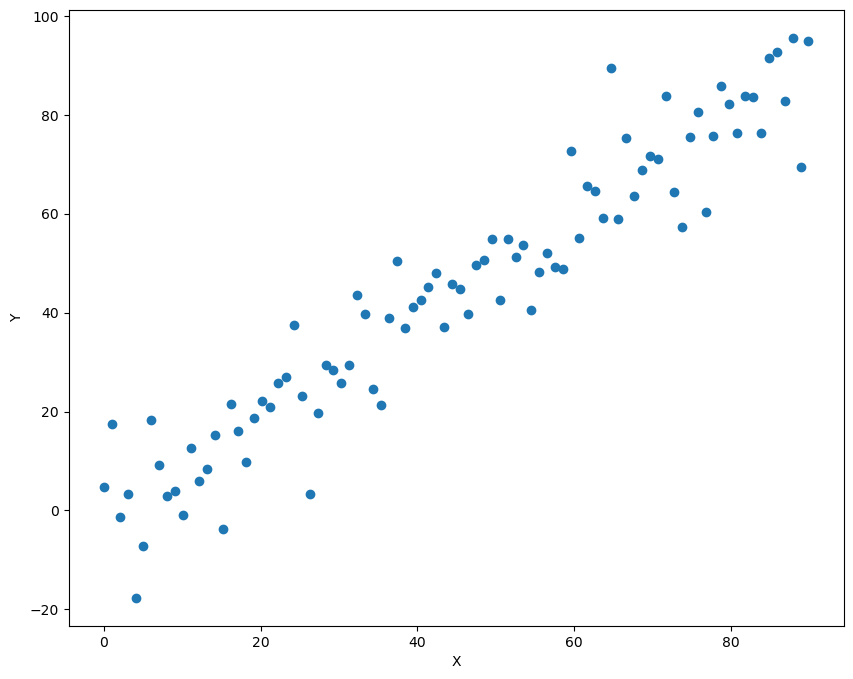

In [16]:
import torch
import matplotlib.pyplot as plt
import numpy as np

#准备数据
x = torch.linspace(0, 100, 100).type(torch.FloatTensor)
rand = torch.randn(100) * 10
y = x + rand

x_train = x[: -10]
x_test = x[-10 :]
y_train = y[: -10]
y_test = y[-10 :]

plt.figure(figsize = (10, 8))
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [6]:
#训练
#定义自动微分变量a，b
a = torch.rand(1, requires_grad = True)
b = torch.rand(1, requires_grad = True)
#学习率
learning_rate = 0.0001
#a，b迭代
for i in range(15):
    predictions = a.expand_as(x_train) * x_train + b.expand_as(x_train)
    loss = torch.mean((predictions - y_train)**2)
    print('loss:', loss)
    loss.backward() #梯度信息放在a.grad和b.grad里面
    a.data.add_(-learning_rate * a.grad.data) #负号：梯度的反方向
    b.data.add_(-learning_rate * a.grad.data)
    a.grad.data.zero_()
    b.grad.data.zero_()

loss: tensor(563.3160, grad_fn=<MeanBackward0>)
loss: tensor(185.0620, grad_fn=<MeanBackward0>)
loss: tensor(108.6911, grad_fn=<MeanBackward0>)
loss: tensor(93.2595, grad_fn=<MeanBackward0>)
loss: tensor(90.1360, grad_fn=<MeanBackward0>)
loss: tensor(89.5013, grad_fn=<MeanBackward0>)
loss: tensor(89.3713, grad_fn=<MeanBackward0>)
loss: tensor(89.3442, grad_fn=<MeanBackward0>)
loss: tensor(89.3383, grad_fn=<MeanBackward0>)
loss: tensor(89.3370, grad_fn=<MeanBackward0>)
loss: tensor(89.3366, grad_fn=<MeanBackward0>)
loss: tensor(89.3365, grad_fn=<MeanBackward0>)
loss: tensor(89.3365, grad_fn=<MeanBackward0>)
loss: tensor(89.3364, grad_fn=<MeanBackward0>)
loss: tensor(89.3365, grad_fn=<MeanBackward0>)


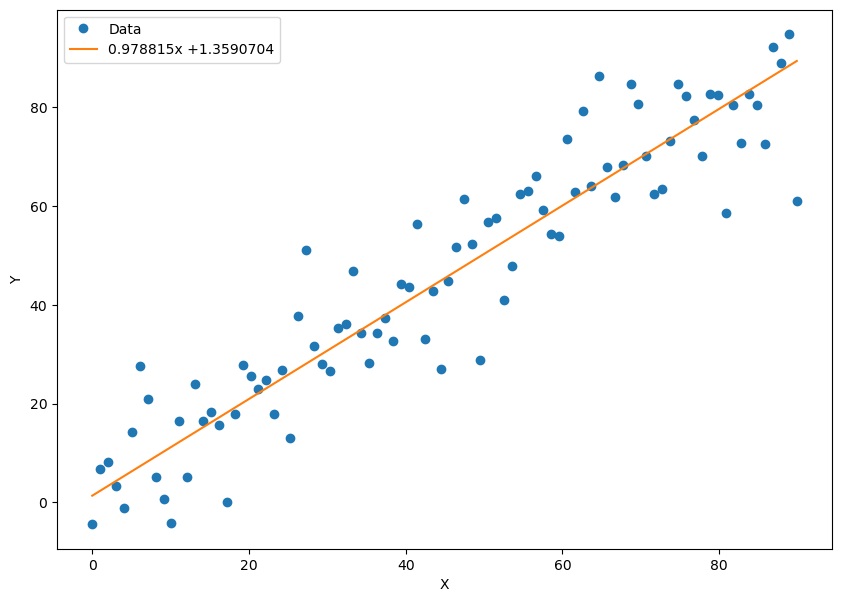

In [10]:
#训练
x_data = x_train.data.numpy()
y_data = y_train.data.numpy()

plt.figure(figsize = (10, 7))
xplot, = plt.plot(x_data, y_data, 'o')
yplot, = plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())

plt.xlabel('X')
plt.ylabel('Y')
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])
plt.legend([xplot, yplot], ['Data', str1])
plt.show()

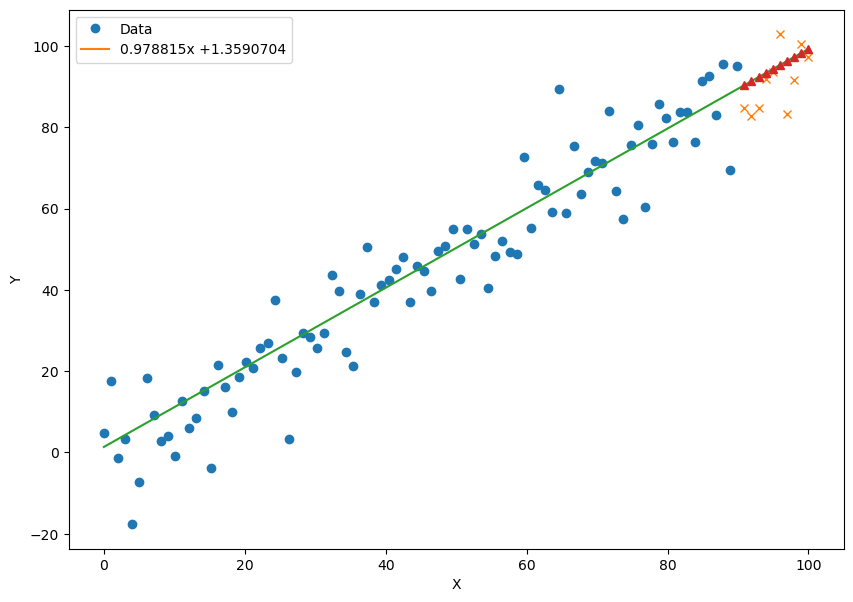

In [24]:
#预测
predictions = a.expand_as(x_test) * x_test + b.expand_as(x_test)
predictions

#绘制预测结果
x_data = x_train.data.numpy()
y_data = y_train.data.numpy()
x_pre = x_test.data.numpy()
y_pre = y_test.data.numpy()

plt.figure(figsize = (10, 7))
plt.plot(x_data, y_data, 'o') #绘制训练数据
plt.plot(x_pre, y_pre, 'x') #绘制预测数据，'s'表示使用方形标记来显示数据点

x_data = np.r_[x_data, x_pre] #将 x_pre 中的元素追加到 x_data 中，使得 x_data 包含了原来的数据和 x_pre 中的数据
plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())
plt.plot(x_pre, a.data.numpy() * x_pre + b.data.numpy(), '^')
plt.xlabel('X')
plt.ylabel('Y')
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])
plt.legend([xplot, yplot], ['Data', str1])
plt.show()